In [3]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import tensorflow as tf
#from tensorflow.keras.callbacks import TensorBoard 
import time 

#name = "Simple-RNN-imdb-{}".format(int(time.time()))
#tensorboard = TensorBoard(log_dir='simple_RNN_ICP_log/{}'.format(name))
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Dropout(0.2))
model.add(SimpleRNN(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train, y_train, epochs=10, batch_size=64 )#, callbacks=[tensorboard])
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]))
print("Loss: %.2f%%" % (scores[0]))

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 100)               13300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 173,401
Trainable params: 173,401
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
25000/25000 [==============================] - 108s 4ms/step - loss: 0.6968 - acc: 0.5214
Epoch 2/10
25000/25000 [======

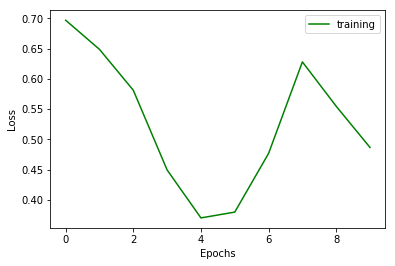

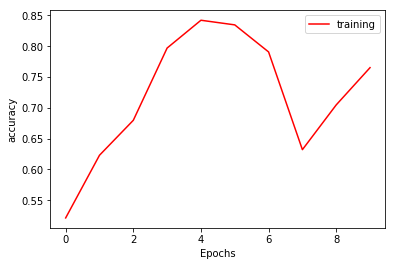

In [6]:
import matplotlib.pyplot as plt
def plot_history(value):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel("Loss")
    plt.plot(history.history['loss'], 'g')
    plt.legend(['training'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel("accuracy")
    plt.plot(history.history['acc'], 'r')
    plt.legend(['training'])
    plt.show()
    
plot_history(history)